In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from textblob import TextBlob

In [113]:
posts_file_path = os.path.join('..', 'data', 'raw', "TheRedPill_weeks_52.json")
posts_df = pd.read_json(posts_file_path)

In [114]:
pd.set_option('display.max_columns', None)
posts_df.head(n=5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,thumbnail_height,thumbnail_width,media,media_embed,post_hint,preview,secure_media,secure_media_embed,banned_by,author_cakeday,edited,media_metadata,author_created_utc,author_flair_template_id,category,content_categories,gilded,removal_reason,suggested_sort,archived,can_gild,distinguished,hidden,quarantine,subreddit_name_prefixed,crosspost_parent,crosspost_parent_list,author_premium,treatment_tags,upvote_ratio
0,[],0.0,Gavin-Sangria,None,[],None,text,t2_4jylj5mz,0.0,[],False,False,1569559102,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9vf4l,False,False,False,False,0.0,True,False,,bp,"[{'e': 'text', 't': 'Blue Pill Example'}]",f656786c-9009-11e2-8e87-12313d183eb5,Blue Pill Example,dark,richtext,False,False,True,0,0,False,no_ads,/r/TheRedPill/comments/d9vf4l/blue_pulled_cele...,False,0.0,1569559103,1,[removed],True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,"Blue pulled celebrities who wasted their smv, ...",0.0,1.569645e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,treehugger195050,None,[],None,text,t2_2w4t467n,0.0,[],False,False,1569551940,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9u5ql,False,False,False,False,0.0,True,False,,NaN,[],NaN,NaN,dark,text,False,False,True,2,0,False,no_ads,/r/TheRedPill/comments/d9u5ql/need_help_in_bet...,False,0.0,1569551942,1,[removed],True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,Need Help - In Beta Male LDR with Filipina,0.0,1.569638e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,BFlocka,None,[],None,text,t2_pfd86,0.0,[],False,False,1569551575,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9u37g,False,False,False,False,1.0,True,False,,NaN,[],NaN,NaN,dark,text,False,False,True,10,0,False,no_ads,/r/TheRedPill/comments/d9u37g/just_had_to_swal...,False,0.0,1569551576,0,"I’m 23, first year out of college, gf is also ...",True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,Just had to swallow a massive redpill tonight ...,0.0,1.569638e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,Ragomai,None,[],None,text,t2_fgfrn,0.0,[],False,False,1569550482,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/d...,{},d9tvxf,False,False,False,False,1.0,True,False,,unflaired,[],NaN,NaN,dark,text,False,False,True,8,0,False,no_ads,/r/TheRedPill/comments/d9tvxf/when_it_actually...,False,0.0,1569550484,2,i've always known in the back of my mind that ...,True,False,[],False,TheRedPill,t5_2ve1u,0,public,self,"When it actually hits you how accurate RP is, ...",0.0,1.569637e+09,https://www.reddit.com/r/TheRedPill/comments/d...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [115]:
posts_df['created_date'] = pd.to_datetime(
    posts_df['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(x)),
    errors='coerce')

posts_df['created_date'] = posts_df['created_date'].dt.date

In [116]:
print(posts_df.created_date.min())
print(posts_df.created_date.max())

2018-08-11
2019-09-26


In [117]:
posts_df.set_index('created_date', inplace=True)

In [118]:
# posts_df['post_type'] = posts_df['selftext'].apply(lambda x: (x not in ['[removed]', '']) & (~pd.isnull(x)))
posts_df['post_type'] = np.select(
    [
        posts_df['selftext'] == '[removed]', 
        posts_df['selftext'] == '[deleted]', 
        posts_df['selftext'] == '',
        pd.isna(posts_df['selftext']) 
    ], 
    [
        'removed', 
        'deleted',
        'blank',
        'nan'
    ], 
    default='extant'
)
posts_df[['post_type', 'selftext']]

,post_type,selftext
created_date,,
2019-09-26,removed,[removed]
2019-09-26,removed,[removed]
2019-09-26,extant,"I’m 23, first year out of college, gf is also ..."
2019-09-26,extant,i've always known in the back of my mind that ...
2019-09-26,extant,"So after a breakup, I took the redpill and it ..."
...,...,...
2018-08-11,nan,NaN
2018-08-11,nan,NaN
2018-08-11,removed,[removed]


In [119]:
posts_df.groupby('post_type')['post_type'].count() #majority are either removed or blank... need to investigate this for sure

post_type
blank       758
deleted      48
extant     2007
nan          75
removed    2485
Name: post_type, dtype: int64

In [120]:
extant_posts = posts_df[posts_df['post_type'] == 'extant']
extant_posts['selftext']

created_date
2019-09-26    I’m 23, first year out of college, gf is also ...
2019-09-26    i've always known in the back of my mind that ...
2019-09-26    So after a breakup, I took the redpill and it ...
2019-09-26    Defend, Explain, Excuse, Rationalize...\n\nThe...
2019-09-26    **Synopsis** \n\nThis is an easy to follow gui...
                                    ...                        
2018-08-11    ##Intro  \nI’ve begun reading Red Pill literat...
2018-08-11    This is a report in which I’ll preach as littl...
2018-08-11    Vegas is the party capital of the United State...
2018-08-11    I fell in love with dressing well and expressi...
2018-08-11    I was semi debating whether this is a field re...
Name: selftext, Length: 2007, dtype: object

In [121]:
curses = TextBlob('Fuck this bullshit. People are assholes and everything they say doesnt mean shit.')
negative_subjective = TextBlob('I hate everything and everything sucks. Everyone is out to get me and its not fair, waaaaaaa')
negative_objective = TextBlob('Country has recorded more than 390,000 new infections and 3,689 deaths over the past 24-hour period')
positive_subjective = TextBlob('I love everything and everything is great. Everyone loves me and and the sun is shining')
positive_objective = TextBlob('Country has added more than 390,000 new jobs and GDP has increased 3 percent per year for a decade')

(curses.sentiment, negative_subjective.sentiment, negative_objective.sentiment, positive_subjective.sentiment, positive_objective.sentiment)

(Sentiment(polarity=-0.3041666666666667, subjectivity=0.6958333333333334),
 Sentiment(polarity=-0.4833333333333334, subjectivity=0.7000000000000001),
 Sentiment(polarity=0.12878787878787878, subjectivity=0.40151515151515155),
 Sentiment(polarity=0.65, subjectivity=0.675),
 Sentiment(polarity=0.3181818181818182, subjectivity=0.4772727272727273))

Polarity ranges from (-1, 1) and subjectivity from (0, 1), so not sure about the ranges but in general the sentiment seems to track relatively well - the negative ones are very different from the positive, but swear words don't seem to immediately indicate negativity - we'll see if thats an issue. Now let's get a post_length feature and polarity/sentiment for each post, so that we can see the extremes in TRP and see if it makes any sense. 

In [122]:
# sentiment_test = extant_posts.loc[:, ['selftext','log_nword']]
sentiment_test = pd.DataFrame(extant_posts.loc[:,'selftext'].apply(lambda text: tuple(TextBlob(text).sentiment)).tolist())

In [123]:
sentiment_test.index = extant_posts.index
sentiment_test['selftext'] = extant_posts['selftext']
sentiment_test.loc[:,'log10_nword'] = sentiment_test.loc[:,'selftext'].apply(lambda x: math.log10(len(x.split())))
sentiment_test.rename(columns = {0:'sentiment', 1:'objectivity'}, inplace = True)


In general the short posts seem pretty unreliable - let's see if there is a difference among longer posts, like 250 words or more (the long explainer-type posts ideally).

In [124]:
sentiment_test_long = sentiment_test[sentiment_test['log10_nword'] > math.log10(250)]

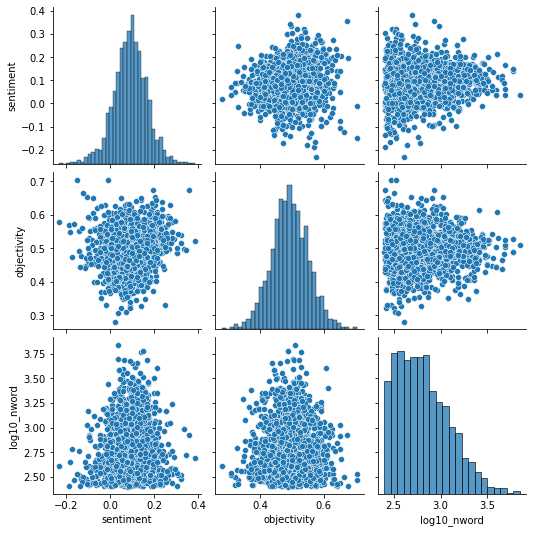

In [125]:
sns.pairplot(sentiment_test_long)

Just as we all expected, TRP is generally positive according to textblob. Let's get some of the extreme examples and see what's up. Unsurprisingly, posts with more words are less ambigious in terms of both sentiment and objectivity, so those will probably be most useful to us.  

In [130]:
#high objectivity
sentiment_test_long.sort_values('objectivity' , ascending= False).head(5).apply(lambda row: print(str(row['objectivity']) + ': ' + row['selftext'] + '\n'), axis= 1)

0.7050893550893552: Most bitches have room in their pussy for another dick

This is a lesson I have learned over time by interacting with my target demographic: Bitches in relationships. 

Now before you start crying about how I’m litterally fucking your girl, hear me out. You were there for her when she was desperate and all alone. You got her at a good time - she was lonely. I’m just picking the fruit when it’s ripe - like you - when she’s bored. 

You see the only thing more desperate and lonely than a girl who doesn’t have a dick to base her identity on, is the girl who does. She’s bored of the same dick every day - and when she gets to thinkin’ she realizes that she has vacancy in her pussy. 

This is where I cum in to fill the vacancy in your girls life - cuz girls need a dream to believe in too dammit #2019. 

There are some things that men can be sure of in life: Death, taxes, and if your girl has available space in her pussy that you aren’t filling - she’s definitely getting i

created_date
2019-07-12    None
2019-05-01    None
2018-08-20    None
2018-08-25    None
2019-04-16    None
dtype: object

In [127]:
#high sentiment
sentiment_test_long.sort_values('sentiment' , ascending= False).head(5).apply(lambda row: print(str(row['sentiment']) + ': ' + row['selftext'] + '\n'), axis= 1)

f tiny t-shirts, and anger/confusion as to why their commitment to the iron isn't paying off (which in lots of cases leads to depression and giving up on RP ideas all together). 

&amp;#x200B;

Happy hunting 

\-D

0.2786404818407833: Ok, so this is a big thing here in Brazil right now. Neymar,  one of the biggest football player in Brazil and in the world, was accused of rape by a Instagram girl. She went to the police and opened an accusation against him, then he went on instagram and showed their conversations. As you guys are already expecting the girl was almost begging to fuck him, he even paid her trip to Paris. 

 [This is the video, you can see their conversation by the end of it](https://www.instagram.com/tv/ByMOW-fgicq/?igshid=fq2g0u7v1u9d) 

She fucked him and then sued him for rape. 

I'll translate it to you guys, so it becomes easier to understand: 

(fuck me this was long, but I hope you guys enjoy)

N: Hey fake 

\*PHOTOS\*

N: Now I believe hahahaha

B: You're crazy. 

created_date
2019-08-19    None
2018-08-25    None
2018-08-23    None
2018-09-15    None
2019-09-17    None
2019-08-19    None
2019-08-19    None
2018-08-27    None
2019-04-17    None
2019-04-18    None
2018-09-16    None
2019-08-16    None
2019-08-19    None
2019-08-19    None
2019-05-12    None
2018-09-25    None
2019-06-02    None
2019-07-07    None
2018-08-17    None
2018-09-18    None
dtype: object

In [128]:
#low objectivity
sentiment_test_long.sort_values('objectivity' , ascending= True).head(5).apply(lambda row: print(str(row['objectivity']) + ': ' + row['selftext'] + '\n'), axis= 1)

 daygame session today right before work. I walked around my usual spot and saw girl #1. Went in for the open. She reciprocated well but she was in a rush. I tried to keep the conversation going. I could have done two things in that moment; Walk with her or let her go. At the moment I let her go and she said bye. 

I used the momentum of the first girl to open another girl, asking her what she was drinking. We chatted for a bit before she had to go into a store. I wasn't going to follow her in so I just left it like that.

I went to a second area and gamed around for a few minutes. Doing front stops and working on approaching. They didn't stick too long but I got some practice in.

Went to a bookstore and opened a few girls, nothing serious just small talk. Opened this one girl who looked super serious.

"What are you reading? you look super stressed out"

The girl laughed as a smile crept on her face. "Oh this?! it's for class"

Me and girl talked for a bit, the conversation was fun. 

created_date
2019-02-27    None
2018-09-12    None
2018-09-18    None
2018-09-22    None
2019-05-02    None
2018-08-12    None
2019-06-18    None
2019-08-07    None
2018-09-27    None
2018-09-08    None
2018-09-04    None
2019-06-13    None
2018-09-08    None
2018-09-03    None
2019-02-23    None
2018-08-11    None
2019-04-28    None
2019-08-16    None
2018-09-19    None
2018-09-20    None
dtype: object

In [129]:
#low sentiment
sentiment_test_long.sort_values('sentiment' , ascending= True).head(5).apply(lambda row: print(str(row['sentiment']) + ': ' + row['selftext'] + '\n'), axis= 1)

s just quoting the video without any comments.

Lastly, I don't beat my wife, and don't plan on it. But I also wouldn't call this light arm-slap a beating.

So what are your thoughts?

-0.11404320987654322: I had an epiphany tonight. 

I work part time in retail for pocket money while I study my degree. I have fucked customers before and will continue shitting where I eat since this is not a serious income job.

I had a female customer I was dealing with (I work in ladies department) who was giving me the most subtle IOIs I've learnt to pick up on.

Holding sly eye contact a second longer than  normal, a slight lustful gaze, and I could sub-consciously sense her submissivness through her body language towards me. 

Sadly she did not purchase many items so I did not have much time to game and close a contact detail, the queue to serve customers was long also.

When she walked off my heart sunk as I realised she had an amazing ass.

Tonight as I prepare to sleep I realised she completely

created_date
2019-06-28    None
2019-09-20    None
2019-06-17    None
2019-04-21    None
2019-04-21    None
2019-05-01    None
2018-09-23    None
2019-06-06    None
2018-09-01    None
2019-09-24    None
2018-09-13    None
2019-04-16    None
2019-08-06    None
2018-09-08    None
2019-05-05    None
2019-08-02    None
2019-07-25    None
2018-08-21    None
2018-08-17    None
2019-05-28    None
dtype: object

In general the short posts seem pretty unreliable - let's see if there is a difference among longer posts, like 250 words or more (the long explainer-type posts ideally).